In [131]:
# we  here are going to work on  , califoniya  housing datasets and get inslight of Confidence INtervals with python 
# please note that , i might have make a lots of typing mistakcs ,  i will try no to do so .....

# load datasets 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


# data loading 
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True) # it returns sklearn.utils._bunch.Bunch which itself is dictionary containing ,
xlabel = dataset.data 
ylabel = pd.DataFrame(dataset.target , columns = dataset.target_names)

<Axes: >

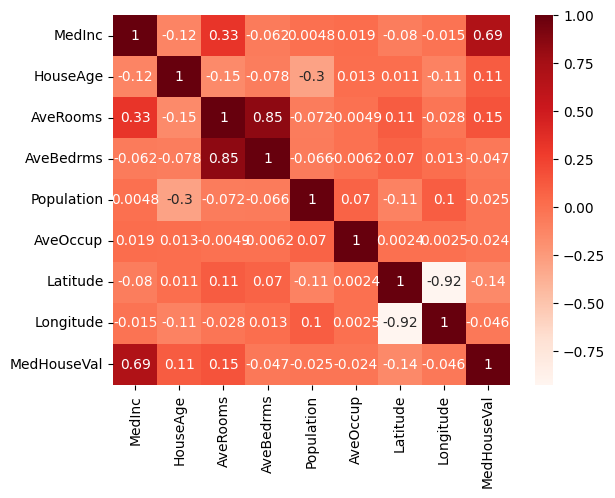

In [132]:
# mergin 
df = xlabel 
df[[_ for _ in ylabel.columns ] ] = ylabel 


#calcuating correlation 
corr_ = df.corr()
sns.heatmap(corr_  , annot= True , cmap= 'Reds')

##  conclision : we foudn that medidun house value is strongly corelated with  medim income 


## now  making 95% confidence interval around this estimated correlation 

In [133]:
# Creating the function to resample and calculate the correlation coefficient n times with the default value being 1000
def sample_corr(data1,data2,samples_size=100):
    sample_corr_=np.empty(samples_size) 

    for i in range(samples_size):
        random_sanple_index=np.random.choice(a=data1.index,size=len(data1),
                          replace=True)
        
        sample_corr_[i]=np.corrcoef(data1.loc[random_sanple_index],data2.loc[random_sanple_index])[0,1] 
        #np.corrcoef returns corelation matrixs but here we only need corelation value , whichs is on index of [0,1] of matrix
    return(sample_corr_)

In [134]:
corr_resamp=sample_corr(df.MedInc,df.MedHouseVal,100)

inslight , 

On sample size of  100 ,  corr_resamp.mean() =  0.6877021249520453        
                            real corr was =  0.69

In [126]:
#increasing the camples
corr_resamp=sample_corr(df.MedInc,df.MedHouseVal,1000)
corr_resamp.mean()

0.6882452289443851

In [135]:
np.percentile(corr_resamp,[2.5,97.5]).round(3)


array([0.68 , 0.696])

array([1, 1, 3])